## AFM basic usage on colab
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pycroscopy/DTMicroscope/blob/afm_ser/DTMicroscope/notebooks/1_AFM_DT_basic_colab_hackathon.ipynb)


In [1]:
!pip install pyro5
!pip install scifireaders
!pip install sidpy
!pip install pynsid
!pip install git+https://github.com/pycroscopy/DTMicroscope.git@#afm_ser


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: The URL 'git+https://github.com/pycroscopy/DTMicroscope.git@#afm_ser' has an empty revision (after @) which is not supported. Include a revision after @ or remove @ from the URL.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!run_server

'run_server' is not recognized as an internal or external command,
operable program or batch file.


# Client side

In [2]:
import matplotlib.pylab as plt
import numpy as np
import Pyro5.api
from IPython.display import clear_output, display



## 1. Get data

In [14]:
!wget https://github.com/pycroscopy/DTMicroscope/raw/boris_dev/DTMicroscope/test/datasets/dset_spm1.h5


--2024-10-11 21:42:54--  https://github.com/pycroscopy/DTMicroscope/raw/boris_dev/DTMicroscope/test/datasets/dset_spm1.h5
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pycroscopy/DTMicroscope/boris_dev/DTMicroscope/test/datasets/dset_spm1.h5 [following]
--2024-10-11 21:42:54--  https://raw.githubusercontent.com/pycroscopy/DTMicroscope/boris_dev/DTMicroscope/test/datasets/dset_spm1.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22317256 (21M) [application/octet-stream]
Saving to: ‘dset_spm1.h5’

dset_spm1.h5        100%[===================>]  21.28M  6.10MB/s    in 4.0s    

2024-10-11 21:4

## 2. Register data to the DigitalTwin

In [3]:
uri = "PYRO:microscope.server@localhost:9091"
mic_server = Pyro5.api.Proxy(uri)
import sys

if 'google.colab' in sys.modules:
    mic_server.initialize_microscope("AFM", data_path = r"dset_spm1.h5")
else:
    mic_server.initialize_microscope("AFM", data_path = "../test/datasets/dset_spm1.h5")
mic_server.setup_microscope(data_source = 'Compound_Dataset_1')#upload dataset?
mic_server.get_dataset_info()

[('channels',
  ['spectral_dataset_0',
   'image_dataset_0',
   'image_dataset_1',
   'image_dataset_2',
   'image_dataset_3',
   'image_dataset_4',
   'image_dataset_5']),
 ('signals',
  ['Response',
   'HeightRetrace',
   'Amplitude1Retrace',
   'Amplitude2Retrace',
   'Phase1Retrace',
   'Phase2Retrace',
   'FrequencyRetrace']),
 ('units', ['a.u.', 'm', 'm', 'm', 'deg', 'deg', 'm']),
 ('scans', [0, 1, 2, 3, 4, 5]),
 ('spectra', []),
 ('point_clouds', [0])]

## 3. Get scan data

In [4]:
array_list, shape, dtype = mic_server.get_scan(channels=['HeightRetrace','image_dataset_1'])
dat = np.array(array_list, dtype=dtype).reshape(shape)


Text(0.5, 1.0, 'image_dataset_1')

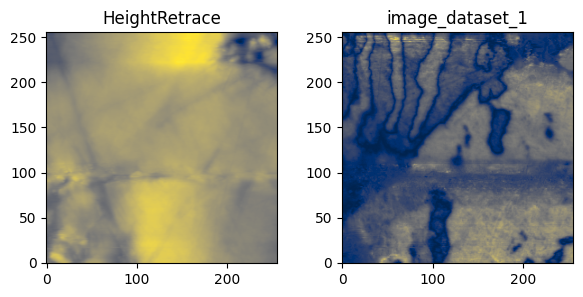

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))

ax[0].imshow(dat[0].T, cmap='cividis', origin='lower')
ax[0].set_title('HeightRetrace')
ax[1].imshow(dat[1].T, cmap='cividis', origin='lower')
ax[1].set_title('image_dataset_1')

In [21]:
print(f'Current location: {mic_server.x, mic_server.y}')

Current location: (9.803921568627648e-09, 9.803921568627648e-09)


## 4. Scanning emulator

In [22]:
gen = mic_server.scanning_emulator(scanning_rate=5)
k = 0

print(f'Line {k}')
line = next(gen)
line = [np.array(l) for l in line]  # Convert list back to numpy array
fig, ax = plt.subplots(1, len(line), figsize=(8,1.5))
for i, ax_ in enumerate(ax):
    ax_.plot(np.arange(len(line[i])), line[i])
    ax_.set_xticks([])
    ax_.set_yticks([])
plt.ion()  # Enable interactive mode
plt.show()
k += 1

while True:
    line = next(gen)
    line = [np.array(l) for l in line]  # Convert list back to numpy array
    for i, ax_ in enumerate(ax):
        ax_.lines[0].set_data(np.arange(len(line[i])), line[i])

    clear_output(wait=True)
    print(f'Line {k}')
    display(fig)

    k += 1


Line 4


KeyboardInterrupt: 

## 5. Get individual line

In [25]:
array_list, shape, dtype  = mic_server.scan_individual_line('vertical', coord = -1e-6, channels=['Amplitude1Retrace', 'Phase1Retrace'])
line = np.array(array_list, dtype=dtype).reshape(shape)

Text(0.5, 1.0, 'Channel_002')

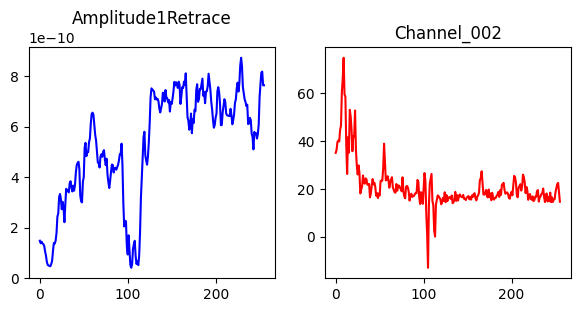

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))

ax[0].plot(line[0].T, color='b')
ax[0].set_title('Amplitude1Retrace')
ax[1].plot(line[1].T, color='r')
ax[1].set_title('Channel_002')

In [ ]:
#print current probe position
print(f'Current location: {mic_server.x, mic_server.y}')

## 6. Scan arbitrary path

In [27]:
corners = np.array([[-2e-6,2e-6],[1e-6,1.8e-6],[2.1e-6,2e-6]]) #real coordinates
array_list, shape, dtype  = mic_server.get_scan(channels=['Amplitude1Retrace',])
dat = np.array(array_list, dtype=dtype).reshape(shape)

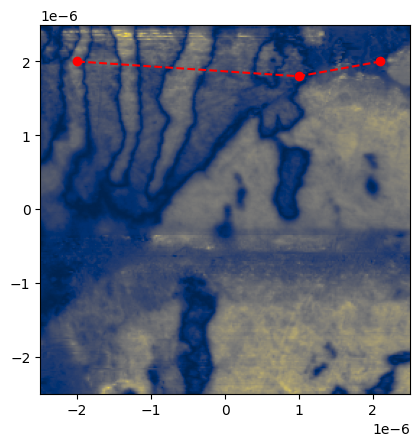

In [28]:
plt.imshow(dat[0].T, origin='lower', extent=(mic_server.x_min, mic_server.x_max, mic_server.y_min, mic_server.y_max), cmap='cividis')
plt.scatter(corners[:,0], corners[:,1], color='red')
plt.plot(*corners.T, '--', color='red')

In [30]:
#print current probe position
print(f'Current location: {mic_server.x, mic_server.y}')

Current location: (-1e-06, 2.5e-06)


## 6. Get spectral data

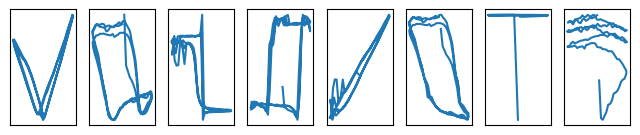

In [32]:
(array_list_spec, shape_spec, dtype_spec), (array_list_y, shape_y, dtype_y) = mic_server.get_spectrum()
_spec_dim = np.array(array_list_spec, dtype=dtype_spec).reshape(shape_spec)
_y = np.array(array_list_y, dtype=dtype_y).reshape(shape_y)
res = (_spec_dim, _y)
fig, ax = plt.subplots(1, len(res[1]), figsize=(8, 1.5))
for i in range(len(res[1])):
    ax[i].plot(res[0], res[1][i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

## 7. Corrupted scans

### 7.1 Real_tip(blunt tip)

In [6]:
kwargs = {'r_tip': 0.5, 'center': [0.5, 0.5]}# make sure center is list and not array 

array_list, shape, dtype  =  mic_server.get_scan(channels=['HeightRetrace',], mod_string=None, mod_kwargs = None)
dat =  np.array(array_list, dtype=dtype).reshape(shape)
array_list, shape, dtype  =  mic_server.get_scan(channels=['HeightRetrace',], mod_string = "real_tip", mod_kwargs = kwargs)
dat0 =  np.array(array_list, dtype=dtype).reshape(shape)
dat0.shape

(1, 256, 256)

Text(0.5, 1.0, 'Blunt tip')

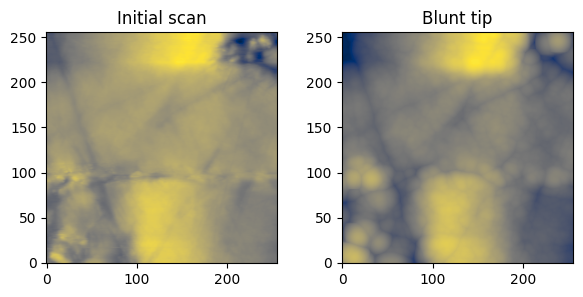

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))

ax[0].imshow(dat[0].T, cmap='cividis', origin='lower')
ax[0].set_title('Initial scan')
ax[1].imshow(dat0[0].T, cmap='cividis', origin='lower')
ax[1].set_title('Blunt tip')

In [9]:
#get individual line
kwargs = {'r_tip': 0.5, 'center': [0.5, 0.5]}

# mod_dict = [{'effect': "", 'kwargs': kwargs},]

array_list, shape, dtype =  mic_server.scan_individual_line('vertical', channels=['Amplitude1Retrace'], coord = -1e-6, mod_string = None, mod_kwargs = None)
line = np.array(array_list, dtype=dtype).reshape(shape)
array_list, shape, dtype =  mic_server.scan_individual_line('vertical', channels=['Amplitude1Retrace'],coord = -1e-6, mod_string = None, mod_kwargs = kwargs)
line1 = np.array(array_list, dtype=dtype).reshape(shape)
line1.shape

(1, 256)

Text(0.5, 1.0, 'Tip doubling')

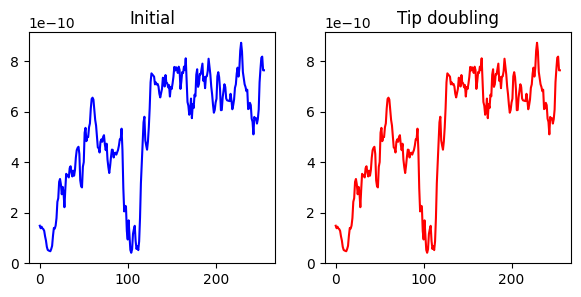

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))

ax[0].plot(line[0], color='b')
ax[0].set_title('Initial')
ax[1].plot(line1[0], color='r')
ax[1].set_title('Tip doubling')

### 7.3 Non-perfect PI coefficients

In [19]:
kwargs_low_I = {'I': 2, 'dz':10e-9, 'sample_rate': 2000}
kwargs_high_I = {'I': 30, 'dz':10e-9, 'sample_rate': 2000}
kwargs_normal_I = {'I': 10, 'dz':10e-9, 'sample_rate': 2000}


In [20]:
dat =  mic_server.get_scan(channels=['HeightRetrace',], mod_string = None, mod_kwargs = None)
array_list, shape, dtype =  mic_server.get_scan(channels=['HeightRetrace',], mod_string = "real_PID", mod_kwargs = kwargs_normal_I)
dat_norm = np.array(array_list, dtype=dtype).reshape(shape)

array_list, shape, dtype  =  mic_server.get_scan(channels=['HeightRetrace',], mod_string = "real_PID", mod_kwargs = kwargs_low_I)
dat_low = np.array(array_list, dtype=dtype).reshape(shape)

array_list, shape, dtype  =  mic_server.get_scan(channels=['HeightRetrace',], mod_string = "real_PID", mod_kwargs = kwargs_high_I)
dat_high = np.array(array_list, dtype=dtype).reshape(shape)

## 28 seconds without server and 29 sec with server

# Hackathon Problems

Here we will explore three different example problems in AFM

- image reconstruction with sparse scanning
- optimization of PID controls
- deconvolution of probe

## Image Reconstruction with Sparse Scanning

To reduce the time taken to acquire an image in AFM, it is preferable to not scan in a raster fashion but rather along a different trajectory, to acquire a subset of the pixels. This presents a problem of image reconstruction, because the sparse measurements need to be used to 'fill in' the missing pixels in the image. A variety of different computer vision approaches can be used to solve this, all with pros and cons. New methods are constantly being developed for this task. However, one of the challenges in AFM is that we cannot acquire 'random' pixels; being a physical probe, it needs to be scanned along a physical path, generally limiting the trajectory to e.g., spirals, arcs, etc.

In [ ]:
#Let's do the simplest thing to speed up scanning: just start skipping lines.

y_coords = np.linspace(mic_server.y_min, mic_server.y_max, 256)
new_image = np.zeros(shape=(256, 256,2))
mask = np.zeros(new_image.shape[:2])

for ind,coord in enumerate(y_coords):
    #Scan every 4th line
    if ind%4==0:
        line = mic_server.scan_individual_line('horizontal', coord = coord, channels=['Amplitude1Retrace', 'Phase1Retrace'])
        new_image[ind,:,0] = line[0][0]
        new_image[ind,:,1] = line[0][1]
        mask[ind,:]=1

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
axes[0].imshow(mask, interpolation = 'None')
axes[0].set_title('Mask')
axes[1].imshow(new_image[:,:,0])
axes[2].imshow(new_image[:,:,1])
axes[1].set_title('Amplitude')
axes[2].set_title('Phase')

In [ ]:
#A simple reconstruction algorithm is biharmonic inpainting. Let's try it

from skimage.restoration import inpaint
from sklearn.metrics import mean_absolute_error

inverted_mask = np.full(mask.shape, 1)
inverted_mask[mask==1]=0

sparse_image = new_image[:,:,0]
sparse_image_norm = (sparse_image - sparse_image.min()) / (sparse_image.max() - sparse_image.min())
inpainted_image_amp = inpaint.inpaint_biharmonic(sparse_image_norm, inverted_mask)

sparse_image = new_image[:,:,1]
sparse_image_norm = (sparse_image - sparse_image.min()) / (sparse_image.max() - sparse_image.min())
inpainted_image_phase = inpaint.inpaint_biharmonic(sparse_image_norm, inverted_mask)

#compare to the ground truth to calculate error
array_list, shape, dtype =  mic_server.get_scan(channels=['Amplitude1Retrace',])
amp_data_gt =  np.array(array_list, dtype=dtype).reshape(shape)[0,:,:]

array_list, shape, dtype =  mic_server.get_scan(channels=['Phase1Retrace',])
phase_data_gt =  np.array(array_list, dtype=dtype).reshape(shape)[0,:,:]

mae_amp = mean_absolute_error(amp_data_gt, inpainted_image_amp)
mae_phase = mean_absolute_error(phase_data_gt, inpainted_image_phase)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].imshow(inpainted_image_amp)
axes[1].imshow(inpainted_image_phase)
axes[0].set_title('Amplitude. MAE:{:.2f}'.format(mae_amp))
axes[1].set_title('Phase, MAE:{:.2f}'.format(mae_phase))

## Optimization of PID controls

Here we play with different PID controls, see which gives the better result

Can you adjust the PID controls after collecting a line of data, towards the optimum?

## Deconvolution of the probe

You can play here with different probe sizes, and double tips, etc. Given some imaging under these conditions with noise, can you recover the 'true' image? A variety of probe deconvolution methods exist, but there are opportunities (e.g., use data from multiple channels). Also consider if we had sparse imaging + probe deconvolution.